In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [4]:
import seaborn as sns

<AxesSubplot:ylabel='MEDV'>

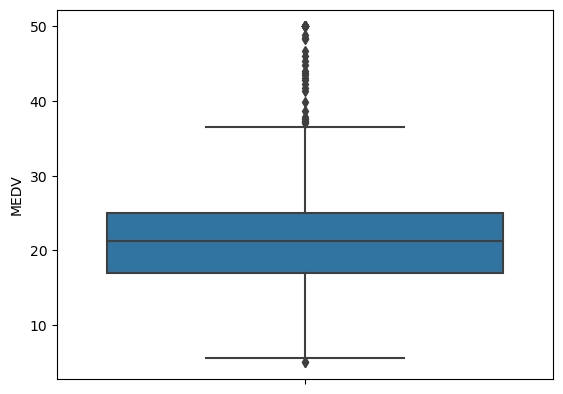

In [5]:
#For the "Median value of owner-occupied homes" provide a boxplot
sns.boxplot(y='MEDV',data=boston_df)

In [6]:
#Provide a  bar plot for the Charles river variable
CHAS_var=boston_df.groupby('CHAS').count().reset_index()

In [7]:
CHAS_var.head()

,CHAS,Unnamed: 0,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.0,471,471,471,471,471,471,471,471,471,471,471,471,471
1,1.0,35,35,35,35,35,35,35,35,35,35,35,35,35


<AxesSubplot:xlabel='CHAS', ylabel='Unnamed: 0'>

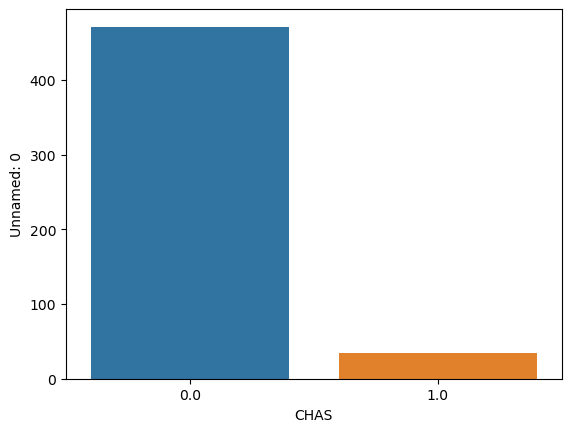

In [8]:
sns.barplot(x='CHAS',y='Unnamed: 0',data=CHAS_var)

<AxesSubplot:xlabel='AGE_Group', ylabel='MEDV'>

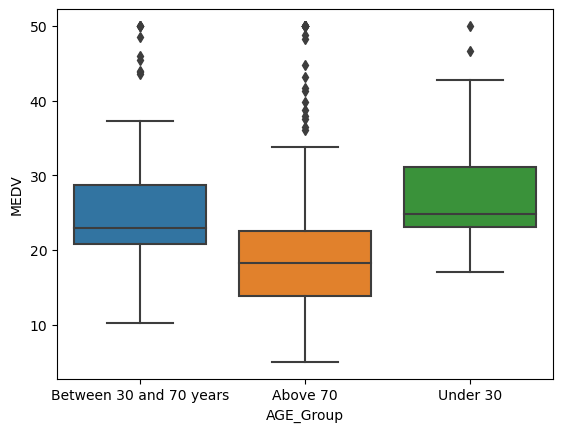

In [17]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df['AGE_Group']=boston_df['AGE']
boston_df.loc[(boston_df['AGE'] <= 30), 'AGE_Group'] = 'Under 30'
boston_df.loc[(boston_df['AGE'] > 30) & (boston_df['AGE']<70), 'AGE_Group'] = 'Between 30 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_Group'] = 'Above 70'
sns.boxplot(x='AGE_Group',y='MEDV',data=boston_df)


<AxesSubplot:xlabel='NOX', ylabel='INDUS'>

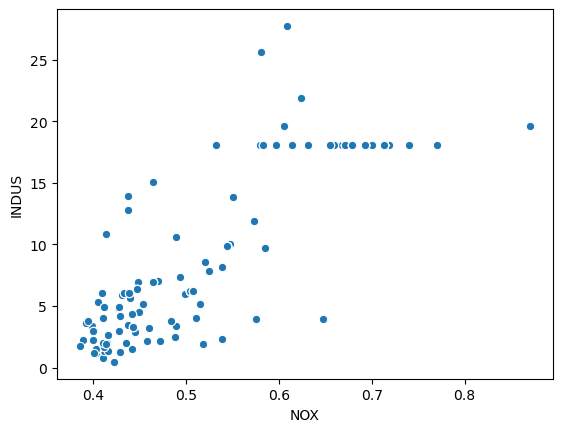

In [10]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
sns.scatterplot(x='NOX',y='INDUS',data=boston_df)
#they have a positive relationship, that is, INDUS increases with NOX, or NOX increases with INDUS.

Text(0.5, 0, 'Pupil to Teacher Ratio')

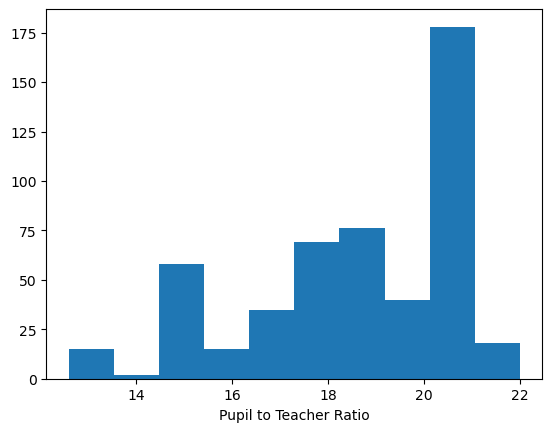

In [11]:
#Create a histogram for the pupil to teacher ratio variable
import matplotlib.pyplot as plt
plt.hist(data=boston_df,x='PTRATIO')
plt.xlabel("Pupil to Teacher Ratio")

State your hypothesis.
Use α = 0.05
Perform the test Statistics.
State the conclusion from the test.

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference")

[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

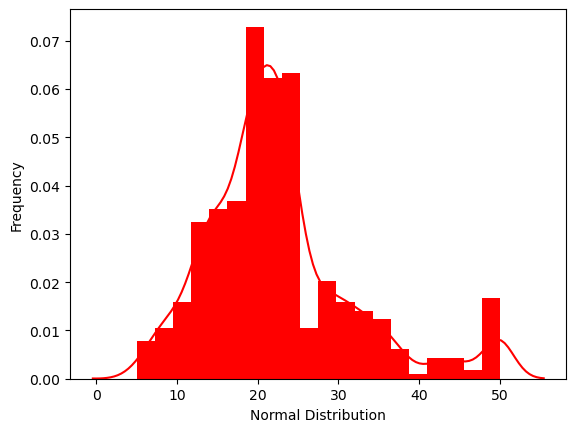

In [12]:
ax = sns.distplot(boston_df['MEDV'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

In [13]:
import scipy.stats
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], center='mean')

# since the p-value is greater than 0.05 we can assume equality of variance

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

In [14]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var=False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river.

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ

In [16]:
scipy.stats.levene(boston_df[boston_df['AGE_Group'] == 'Under 30']['MEDV'],
                   boston_df[boston_df['AGE_Group'] == 'Between 30 and 70 years']['MEDV'], 
                   boston_df[boston_df['AGE_Group'] == 'Above 70']['MEDV'], 
                   center='mean')



LeveneResult(statistic=1.9263167703439688, pvalue=0.14675700390882251)

In [19]:
thirty_lower_medv = boston_df[boston_df['AGE_Group'] == 'Under 30']['MEDV']
thirtyFive_seventy_medv = boston_df[boston_df['AGE_Group'] == 'Between 30 and 70 years']['MEDV']
seventy_older_medv = boston_df[boston_df['AGE_Group'] == 'Above 70']['MEDV']
f_statistic, p_value = scipy.stats.f_oneway(thirty_lower_medv, thirtyFive_seventy_medv, seventy_older_medv)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 34.249179272635395, P-Value: 1.135217093487225e-14


**Conclusion:** Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

State the hypothesis:

*   $H\_0:$ INDUS is not correlated with NOX
*   $H\_1:$ INDUS is correlated with NOX

In [20]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209149, 7.913361061240043e-98)

**Conclusion:** Since the p-value  (Sig. (2-tailed)  < 0.05, we reject  the Null hypothesis and conclude that there  exists a relationship between NOX and INDUS.

In [21]:
#What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 01 Sep 2022   Prob (F-statistic):           1.21e-08
Time:                        06:42:05   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is an impact by DIS on MEDV. The coefficient 1.0916 means that MEDV proportionaly increases with DIS.

